### Decision tree practice. Group 3

* Чуркина Анна
* Пьянков Иван
* Дерябин Паша
* Ермолаев Алексей 
* Игнат Сонец 
* Даша Никанорова

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
 
from sklearn.linear_model import LogisticRegression

%matplotlib inline

**Data**

In [2]:
df = pd.read_csv("data/Part_1.csv") # load data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum() # check for NAs

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#split dataset in features and target variable
X = df.drop(['target'], axis=1) # Features
y = df.target # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

Firstly we fit classifier with default parameters.

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test and train datasets
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Metrics for train dataset
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [6]:
# Metrics for test dataset
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.79      0.68      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91



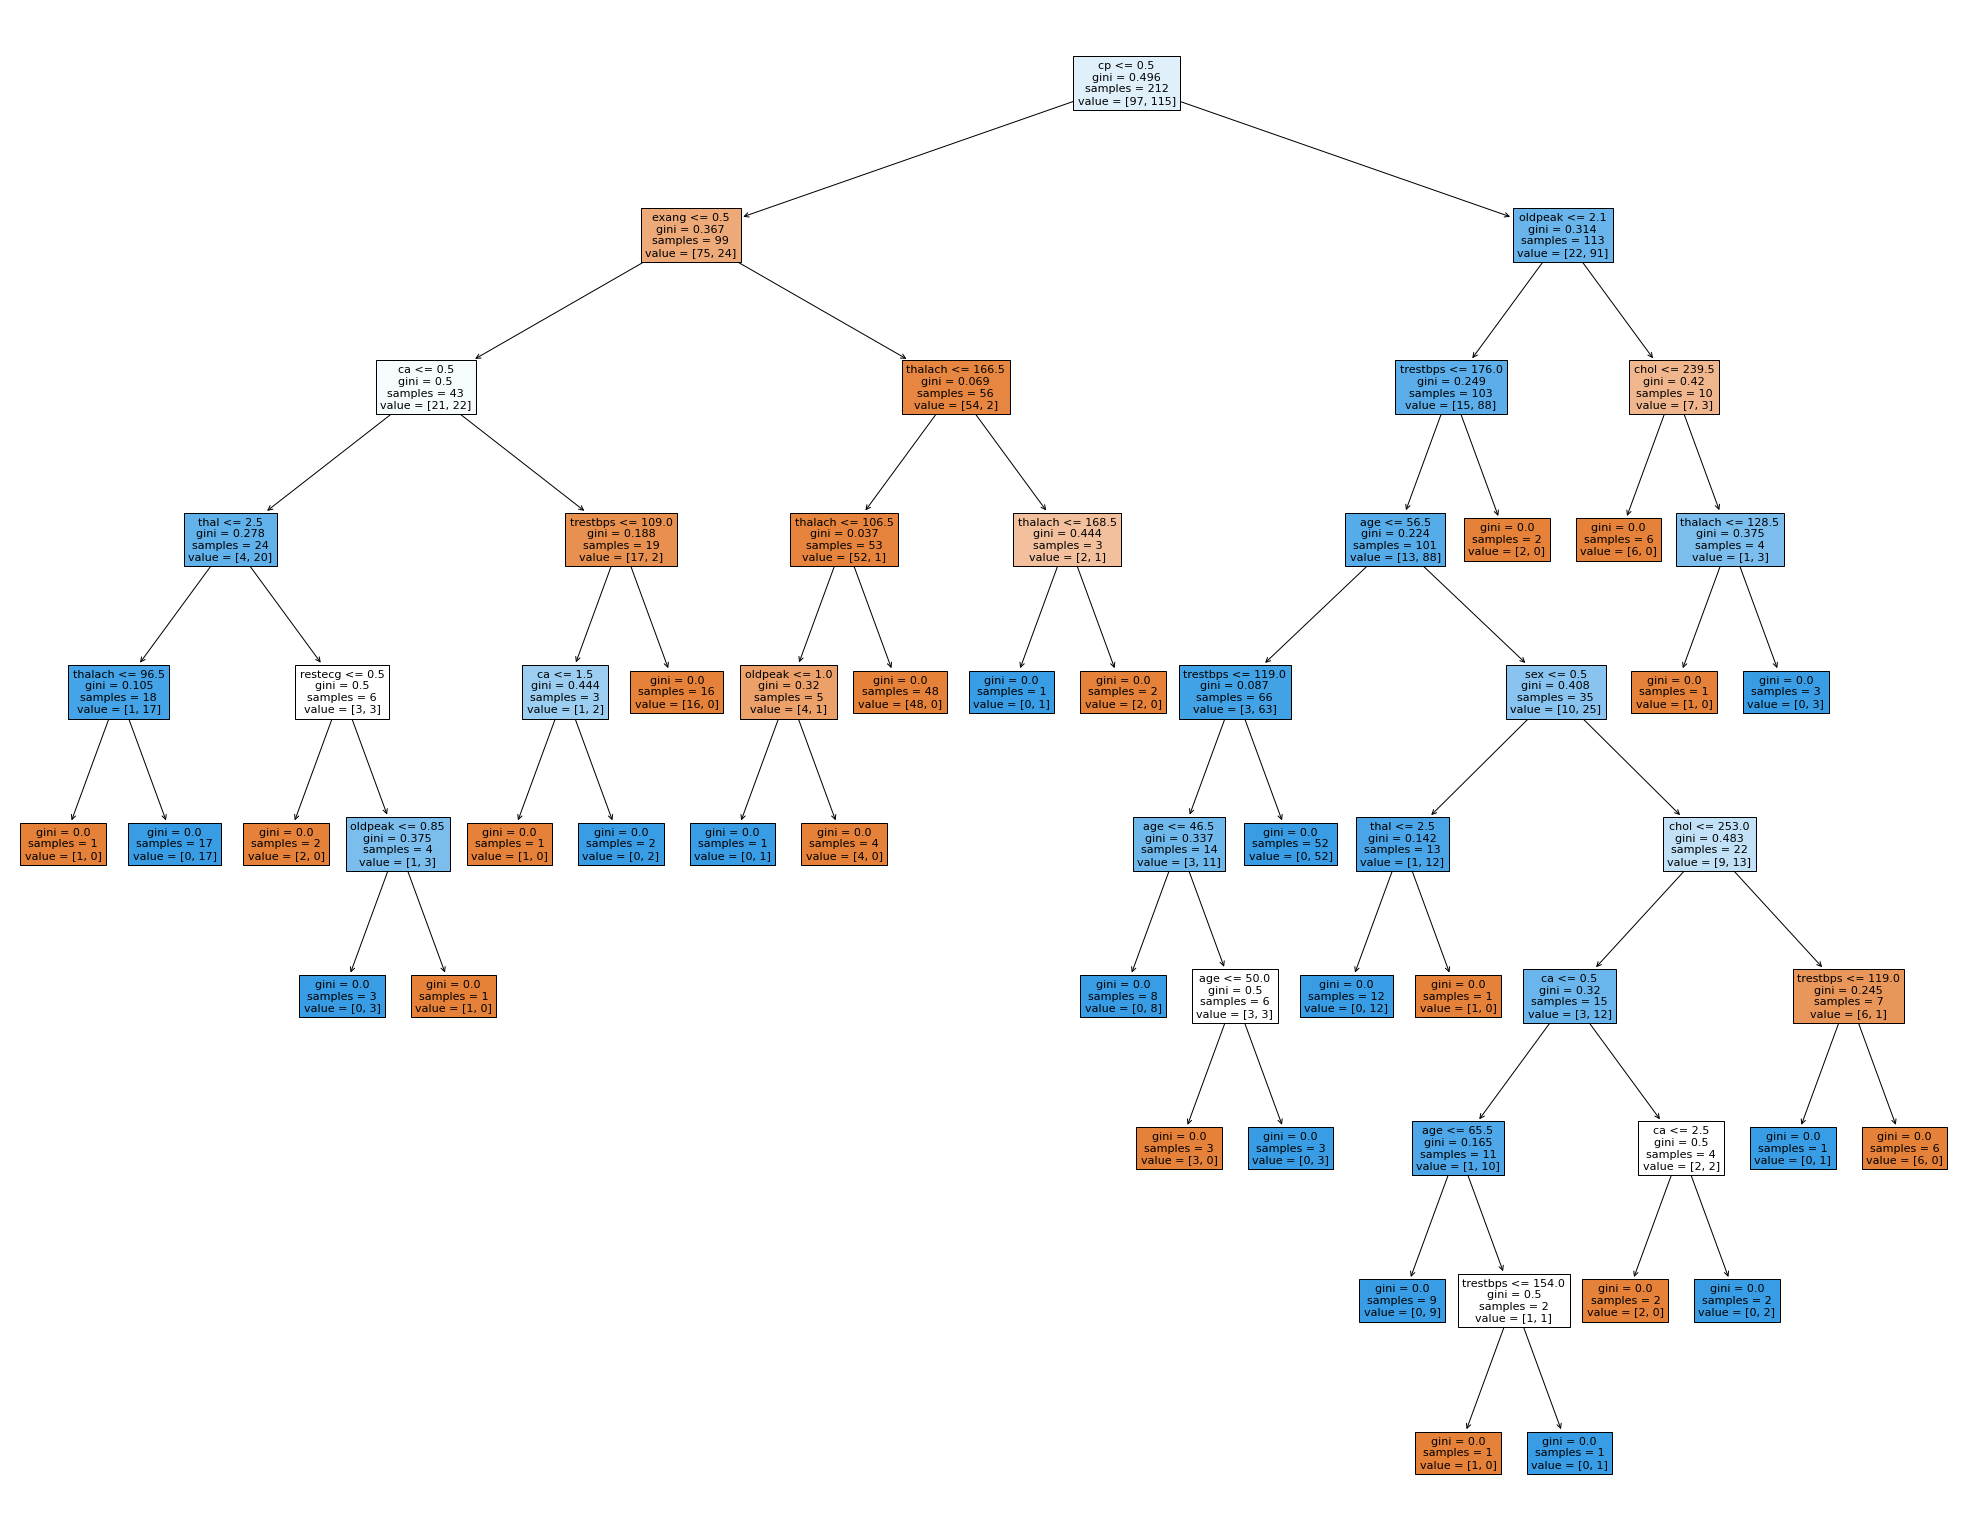

In [7]:
plt.rcParams["figure.figsize"] = 35, 28
plot_tree(clf, filled = True, feature_names = X.columns.values)
plt.show()

The metrics for train dataset are perfect (1.00). However, in terms of the test dataset, classifier fails to predict target variable in with the same level of accuracy, precision and recall. These metrics reach only 0.73 on average.
This means, that the classifier is overfitted. We need to find optimal parameters with `GridSearchCV`.

**Parameters setting**

In [8]:
# create new classifier
clf = tree.DecisionTreeClassifier() 

In [9]:
# parameters for tuning
parametrs = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 10),
             'min_samples_split': range(2, 11),
             'min_samples_leaf': range(2, 10)}

In [10]:
search_clf = GridSearchCV(clf, parametrs, cv=5) 

In [11]:
# parameters tuning and tree fitting
search_clf.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 11)})

In [12]:
# take a look on best parameters
search_clf.best_params_ 

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 7}

In [13]:
# take best classifier
best_clf = search_clf.best_estimator_ 

In [14]:
y_train_pred = best_clf.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        97
           1       0.90      0.93      0.91       115

    accuracy                           0.91       212
   macro avg       0.91      0.90      0.90       212
weighted avg       0.91      0.91      0.91       212



In [15]:
y_pred = best_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        41
           1       0.78      0.76      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In comparison with previous classifier, this one shows higher recall, precision and accuracy. Moreover, the difference between metrics for test and train datasets is smaller.

In [17]:
y_predicted_prob = best_clf.predict_proba(X_test) # predict probabilities

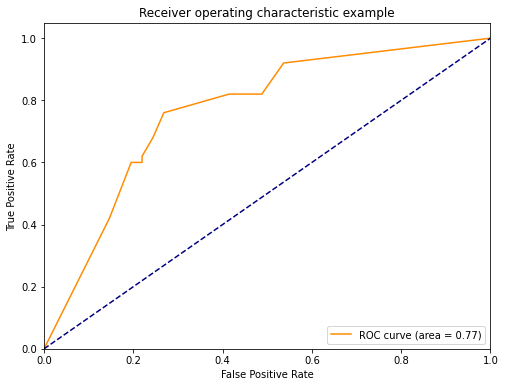

In [18]:
# plot ROC curve
plt.rcParams["figure.figsize"] = 8, 6

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

According to ROC-curve plot, area under curve (AUC) is 0.77.

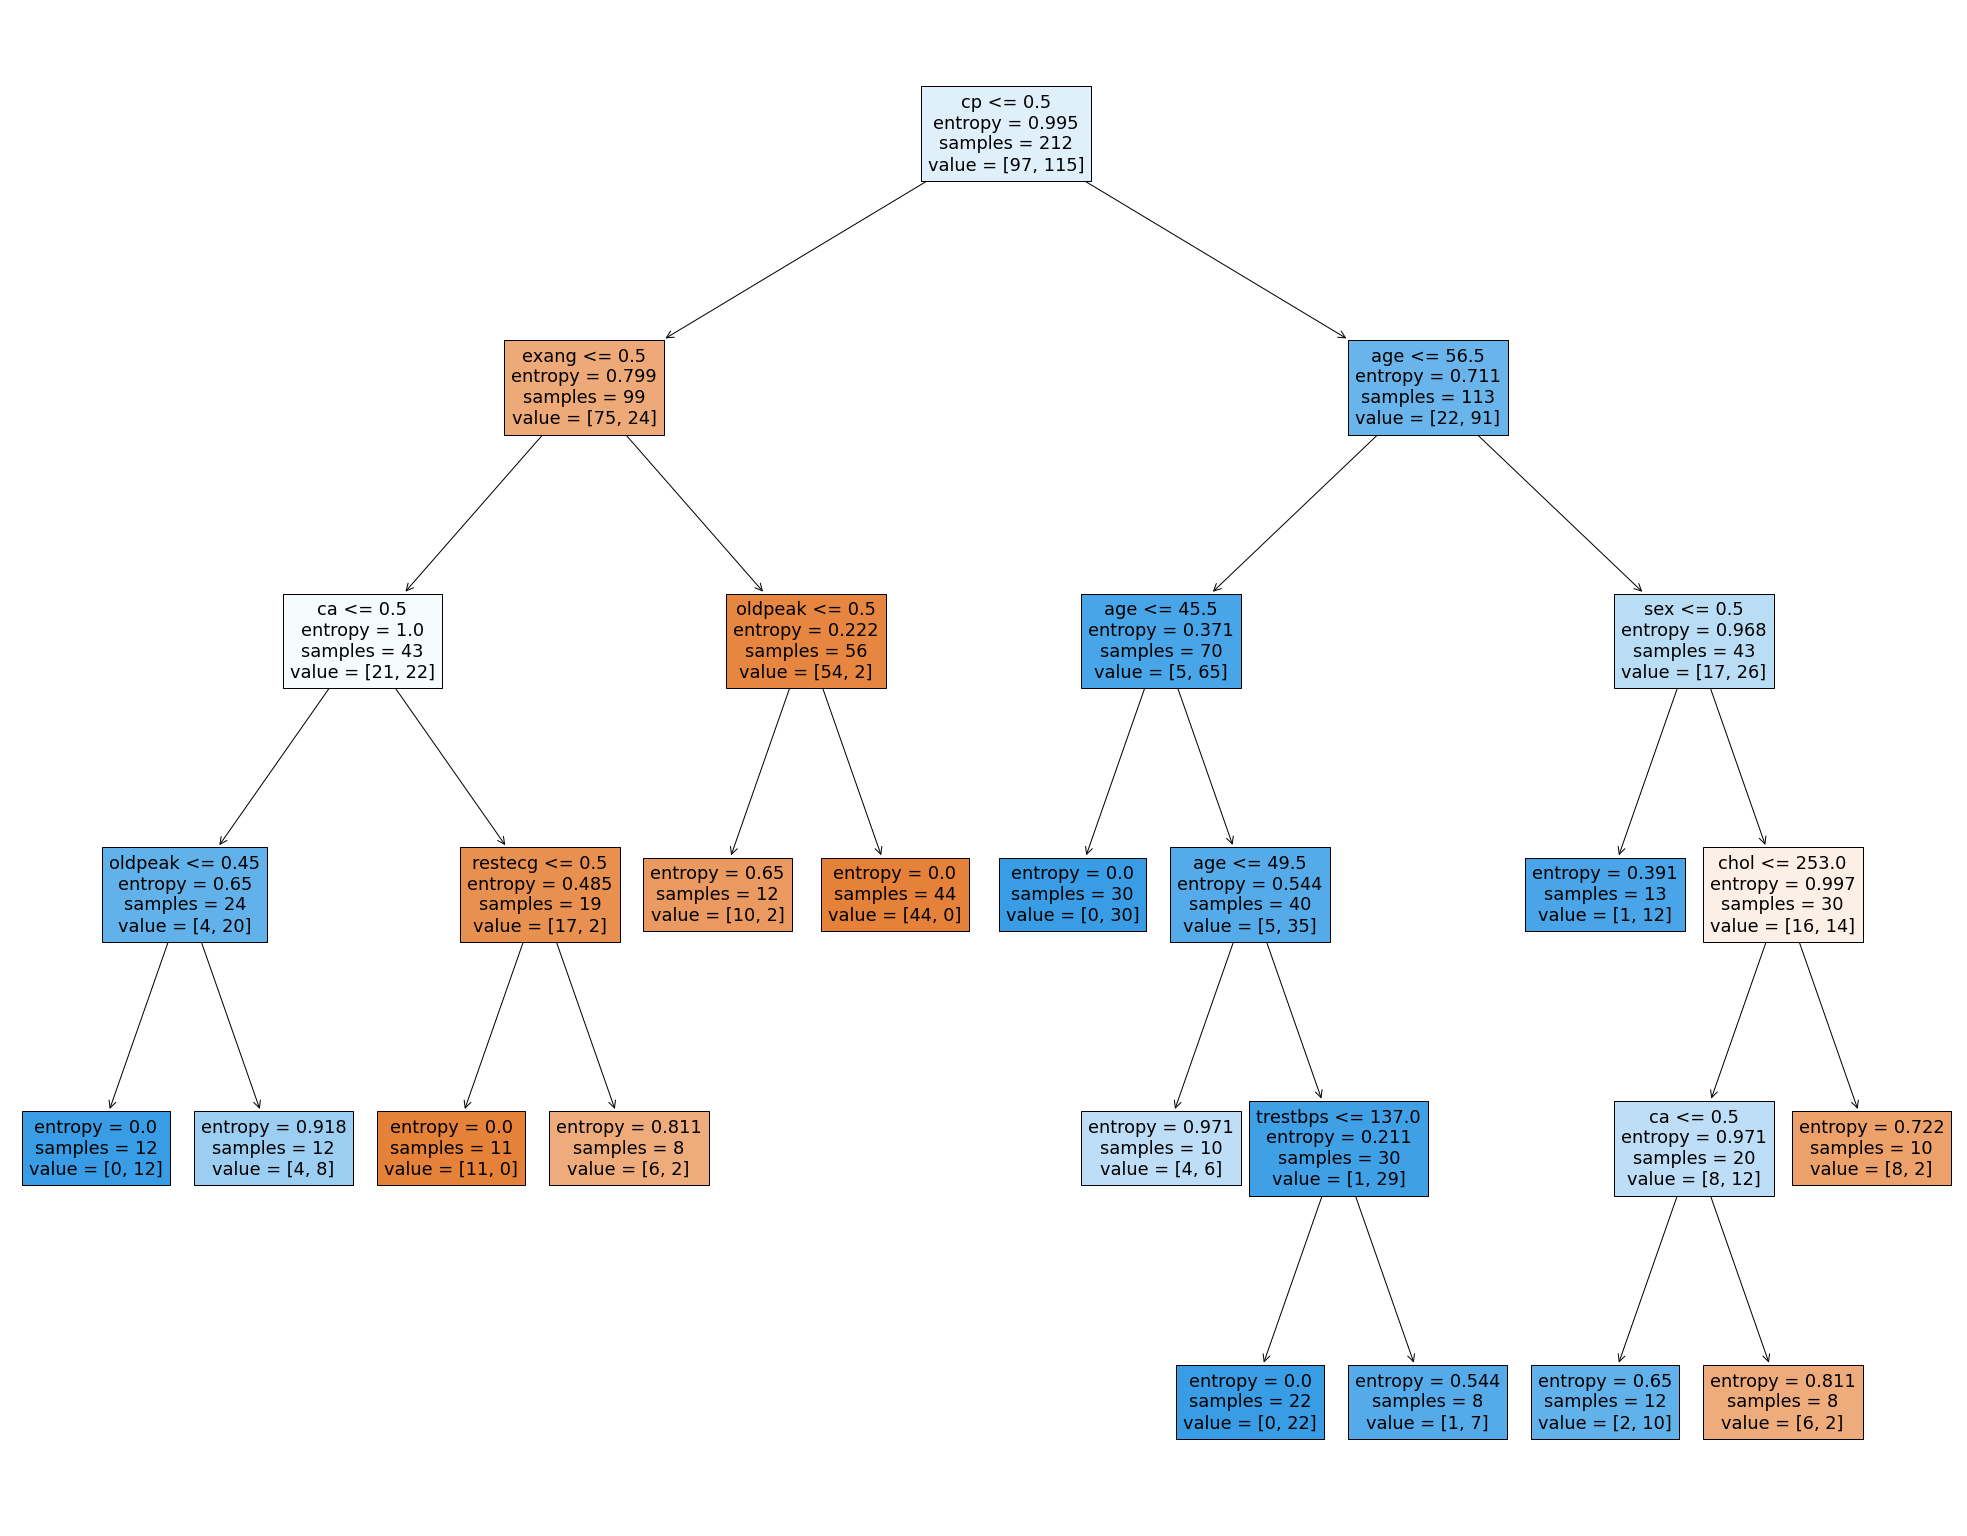

In [19]:
# plot tree scheme
plt.rcParams["figure.figsize"] = 35, 28
plot_tree(best_clf, filled = True, feature_names = X.columns.values)
plt.show()

Looking on the tree graph, we can assume that "cp" (chest pain type) is the most significant feature for classification.

**Feature importance**

In [20]:
importance = best_clf.feature_importances_
features_names = X.columns.values

Text(0.5, 1.0, 'Feature importance')

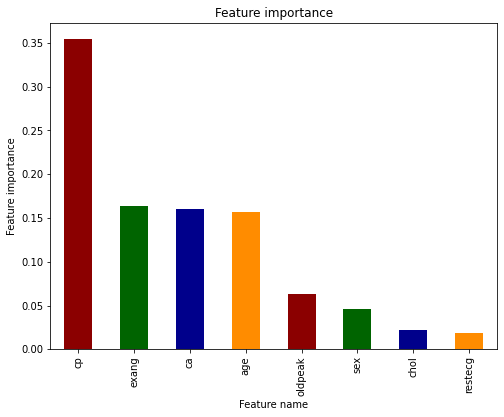

In [27]:
plt.subplots(figsize=(8, 6))
(pd.Series(best_clf.feature_importances_, index=X.columns)
 .nlargest(8)
 .plot.bar(color=['darkred', 'darkgreen', 'darkblue', 'darkorange']))
plt.ylabel("Feature importance")
plt.xlabel("Feature name")
plt.title("Feature importance")

Chest pain type is indeed the most significant feature.

**Logistic regression**

Now we can compare decision tree approach with logistic regression.

In [22]:
# fit model
logreg = LogisticRegression(max_iter = 1000) 
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# predict target variable
y_pred_log = logreg.predict(X_test) 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) 

Accuracy of logistic regression classifier on test set: 0.78


In [24]:
print(metrics.classification_report(y_test, y_pred_log)) 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



As we can see, the metrics obtained with log regression are higher!

Now we can plot ROC-curves for both decision tree and logistic regression model to compare them.

In [25]:
y_predicted_prob_log = logreg.predict_proba(X_test) # predict probabilities for log regression model

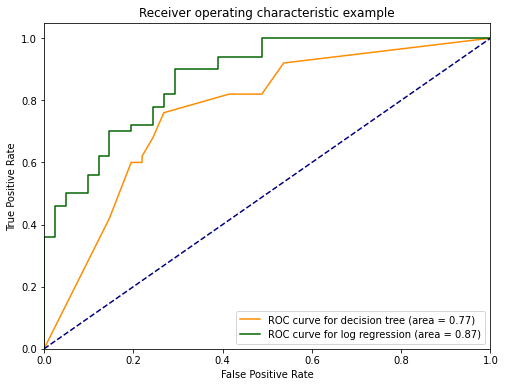

In [26]:
# plot ROC curves for decision tree and log regression
plt.rcParams["figure.figsize"] = 8, 6

# decision tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# logistic regression model
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_predicted_prob_log[:,1])
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', label='ROC curve for decision tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_log, tpr_log, color='darkgreen', label='ROC curve for log regression (area = %0.2f)' % roc_auc_log)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AUC for logistic regression model is 0.87, which is almost 10% higher than AUC for decision tree classifier. It's quite obvious that logistic regression model is more suitable for this data.